## The Amazon Stock Price Dataset

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

In [ ]:
df = pd.read_csv('amazon_stock_price.csv')
df

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...,...
6680,2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
6681,2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
6682,2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200
6683,2023-12-05,143.5500,148.5700,143.1300,146.8800,46822400


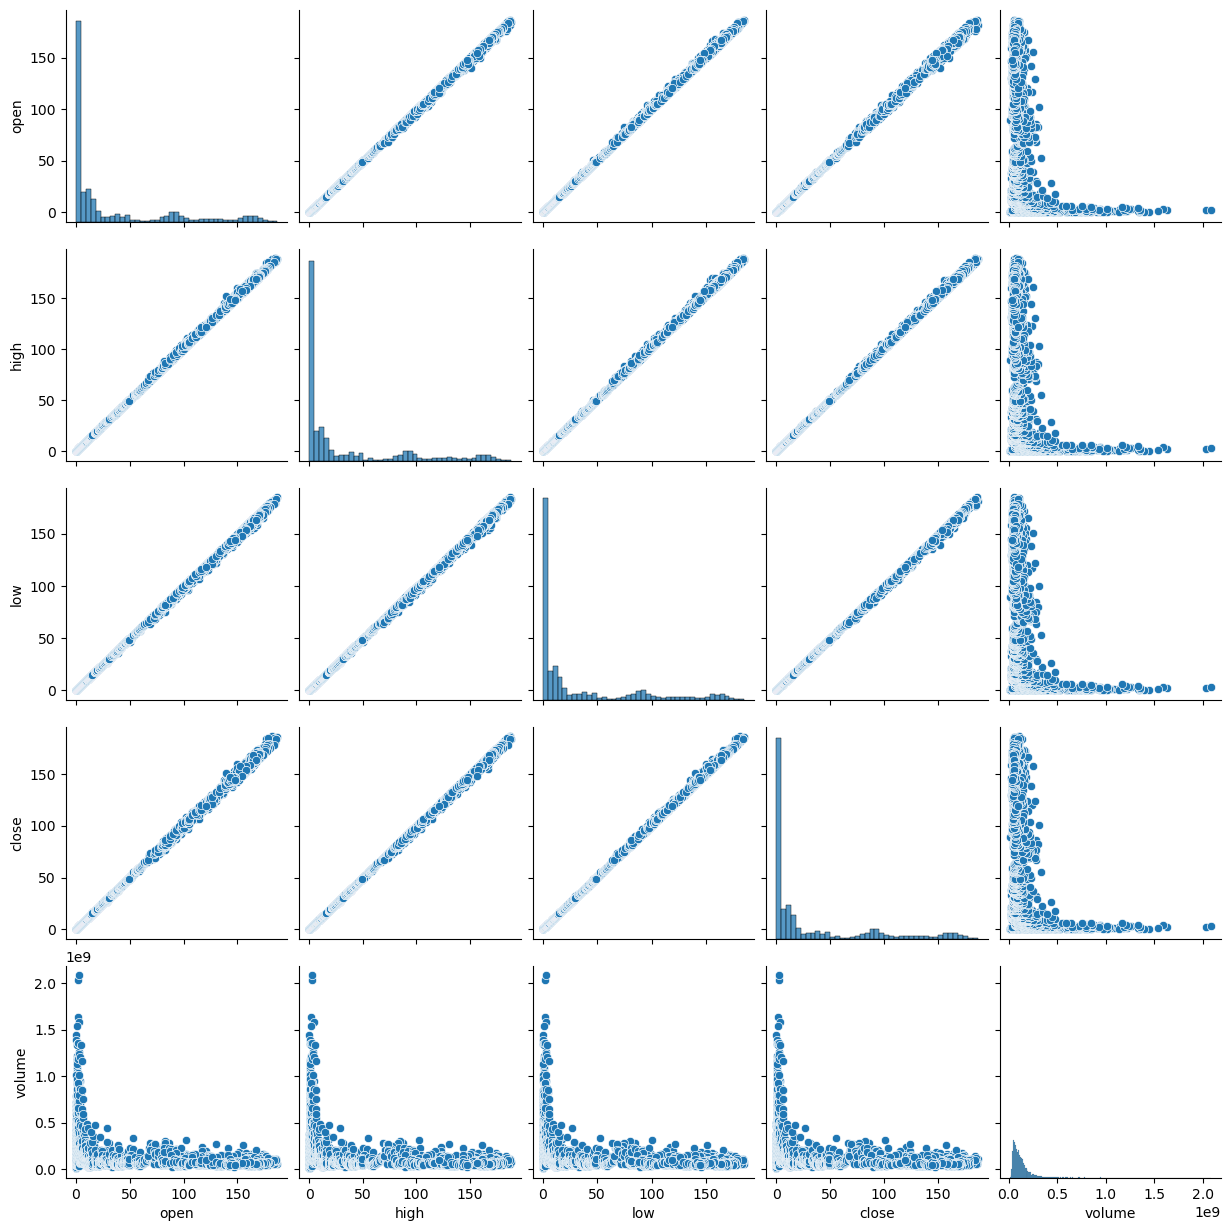

In [ ]:
sns.pairplot(df)

In [ ]:
data = df.copy()

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [ ]:
data = data.sort_index()

In [ ]:
 columns = data.columns

In [ ]:
 for i in range(1, lag+1):
  for col in columns:
    data[f'{col}_prev_{i}'] = data[col].shift(i)

In [ ]:
 data.head(10)

,open,high,low,close,volume,open_prev_1,high_prev_1,low_prev_1,close_prev_1,volume_prev_1,...,open_prev_6,high_prev_6,low_prev_6,close_prev_6,volume_prev_6,open_prev_7,high_prev_7,low_prev_7,close_prev_7,volume_prev_7
date,,,,,,,,,,,,,,,,,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000,0.1219,0.1250,0.0964,0.0979,1.443120e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000,0.0984,0.0990,0.0854,0.0865,2.940000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000,0.0880,0.0885,0.0812,0.0854,1.221360e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000,0.0865,0.0875,0.0818,0.0818,1.093440e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-22,0.0719,0.0724,0.0656,0.0698,235536000,0.0818,0.0823,0.0688,0.0714,3.770640e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-23,0.0703,0.0760,0.0667,0.0750,318744000,0.0719,0.0724,0.0656,0.0698,2.355360e+08,...,0.1219,0.1250,0.0964,0.0979,1.443120e+09,NaN,NaN,NaN,NaN,NaN
1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000,0.0703,0.0760,0.0667,0.0750,3.187440e+08,...,0.0984,0.0990,0.0854,0.0865,2.940000e+08,0.1219,0.1250,0.0964,0.0979,1.443120e+09
1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000,0.0755,0.0823,0.0729,0.0792,1.739520e+08,...,0.0880,0.0885,0.0812,0.0854,1.221360e+08,0.0984,0.0990,0.0854,0.0865,2.940000e+08


In [ ]:
data.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
open_prev_1      1
high_prev_1      1
low_prev_1       1
close_prev_1     1
volume_prev_1    1
open_prev_2      2
high_prev_2      2
low_prev_2       2
close_prev_2     2
volume_prev_2    2
open_prev_3      3
high_prev_3      3
low_prev_3       3
close_prev_3     3
volume_prev_3    3
open_prev_4      4
high_prev_4      4
low_prev_4       4
close_prev_4     4
volume_prev_4    4
open_prev_5      5
high_prev_5      5
low_prev_5       5
close_prev_5     5
volume_prev_5    5
open_prev_6      6
high_prev_6      6
low_prev_6       6
close_prev_6     6
volume_prev_6    6
open_prev_7      7
high_prev_7      7
low_prev_7       7
close_prev_7     7
volume_prev_7    7
dtype: int64

In [ ]:
data = data.dropna(axis=0)

In [ ]:
features = data.columns.drop(['open', 'high', 'low', 'close', 'volume'])

In [ ]:
 features

Index(['open_prev_1', 'high_prev_1', 'low_prev_1', 'close_prev_1',
       'volume_prev_1', 'open_prev_2', 'high_prev_2', 'low_prev_2',
       'close_prev_2', 'volume_prev_2', 'open_prev_3', 'high_prev_3',
       'low_prev_3', 'close_prev_3', 'volume_prev_3', 'open_prev_4',
       'high_prev_4', 'low_prev_4', 'close_prev_4', 'volume_prev_4',
       'open_prev_5', 'high_prev_5', 'low_prev_5', 'close_prev_5',
       'volume_prev_5', 'open_prev_6', 'high_prev_6', 'low_prev_6',
       'close_prev_6', 'volume_prev_6', 'open_prev_7', 'high_prev_7',
       'low_prev_7', 'close_prev_7', 'volume_prev_7'],
      dtype='object')

In [ ]:
X, Y = data[features], data['close']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
 X_train.shape

(5342, 35)

**RandomForest Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150, criterion='squared_error', max_depth=5)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mean_squared_error(Y_test, y_pred)

1953.9947220025547

**XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100 ,learning_rate=0.1)

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([91.72722, 91.91365, 92.09498, ..., 94.21471, 94.36475, 93.7941 ],
      dtype=float32)

In [ ]:
r2_xgb = r2_score(Y_test, y_pred)
mse_xgb = mean_squared_error(Y_test, y_pred)
mae_xgb = mean_absolute_error(Y_test, y_pred)
print(f'R^2 score: {r2_xgb}')
print(f'MSE: {mse_xgb}')
print(f'MAE: {mae_xgb}')

R^2 score: -0.9494331022191529
MSE: 1983.3848013245895
MAE: 33.37361823304685


**GridSeachCV**

In [ ]:
 from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [ ]:
params = {
    "n_estimators": np.arange(50, 500, 100),
    "max_depth": [3, 5, 7]
}

In [ ]:
grid_search = GridSearchCV(XGBRegressor(), cv=TimeSeriesSplit(5), param_grid=params)

In [ ]:
 grid_search.fit(X, Y, verbose=2)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': array([ 50, 150, 250, 350, 450])})

In [ ]:
 estimator = grid_search.best_estimator_

In [ ]:
 estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
 estimator.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = estimator.predict(X_test)

In [ ]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(1957.2659947235861, 33.120499873132765, -123.40633676649362)

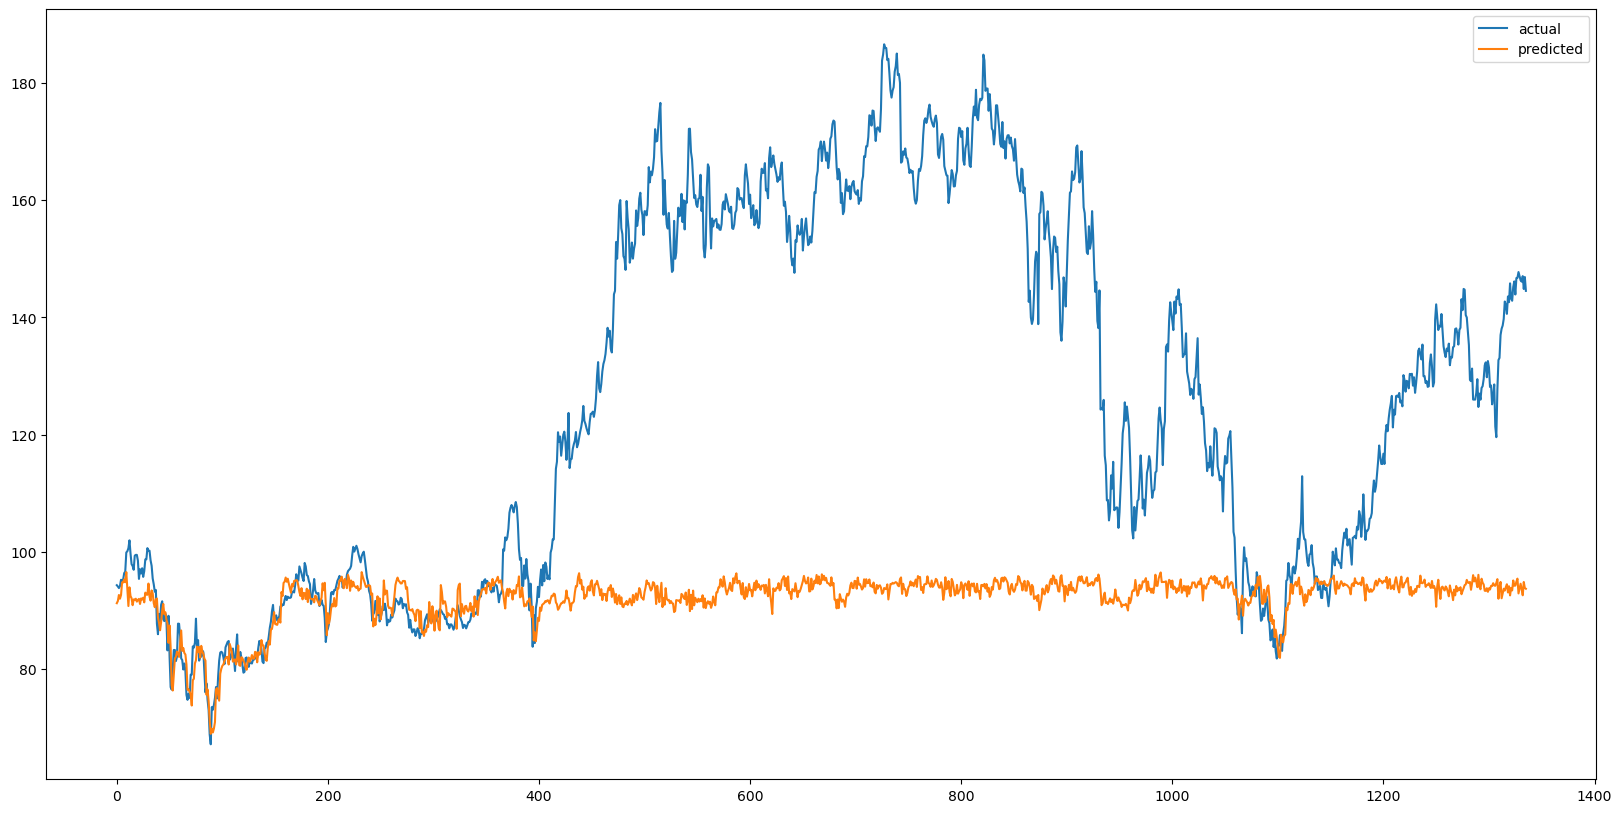

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()